In [1]:
pip install sympy_plot_backends[all]

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize as opt
from google.colab import drive
drive.mount('/content/drive')
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline
from spb import *
import matplotlib.ticker as tck

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


E_0=-135.3034068326948
B_0=0.47294056103438714
B_1=3.841471788958289
V_0=240.82431306022121
lattice=6.221571693858314
格子定数5.05Åを維持するために必要な外部圧力はP=156.756781454773GPa


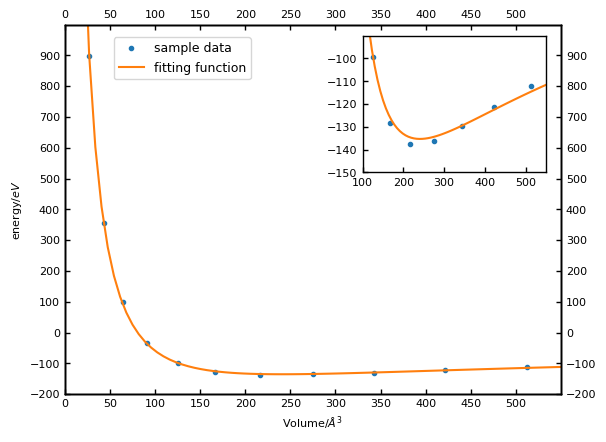

In [3]:
#グラフの設定
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 8 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

#データの取り込み
samplename ='LaH10'
sampledata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/"+samplename+"_EVgraph.csv")
sampledata.head()
Px_1 =  sampledata['lattice']
Py = sampledata['energy']

#格子定数を３乗してE_Vグラフをプロット
Px=Px_1**3

#フィッティングする関数と引数と初期値を設定
def fit_func(x,E_0, B_0, B_1,V_0):
   return E_0+9*V_0*B_0*((((V_0/x)**(2/3)-1)**3)*B_1+(((V_0/x)**(2/3)-1)**2)*(6-4*((V_0/x)**(2/3))))/16

#フィッティングして係数を決定。同時にエネルギーが最小になるときの体積V_0（推定値）とその時の格子定数を決定
res = opt.curve_fit(fit_func, Px, Py,p0=[-105.2,0.658,3.672,216])
E_0 = res[0][0]
B_0 = res[0][1]
B_1 = res[0][2]
V_0 = res[0][3]
lattice = V_0**(1/3)
print('E_0='+str(E_0))
print('B_0='+str(B_0))
print('B_1='+str(B_1))
print('V_0='+str(V_0))
print('lattice='+str(lattice))

# 対象データ
x = np.linspace(20, 700, 100)
y = E_0+9*V_0*B_0*((((V_0/x)**(2/3)-1)**3)*B_1+(((V_0/x)**(2/3)-1)**2)*(6-4*((V_0/x)**(2/3))))/16

# figureを生成する
fig = plt.figure()

# axをfigureに設定する
ax = fig.add_subplot(1, 1, 1)
ax2 = ax.twinx()
ax3 = ax.twiny()
xmin = 0
xmax = 550
xtick = 50
ymin = -200
ymax = 1000
ytick = 100
ax.set_xlim([xmin,xmax])
ax.set_xticks(np.arange(xmin,xmax,xtick))
ax.set_ylim([ymin,ymax])
ax.set_yticks(np.arange(ymin,ymax,ytick))
ax2.set_ylim([ymin,ymax])
ax2.set_yticks(np.arange(ymin,ymax,ytick))
ax3.set_xlim([xmin,xmax])
ax3.set_xticks(np.arange(xmin,xmax,xtick))
ax.set_xlabel('Volume/$\AA^3$')
ax.set_ylabel('energy/$eV$')

# axesにplot。フィッティングした関数とデータ点のプロット
axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
axins.plot(Px, Py,'.', label='sample data')
axins.plot(x,y, label='fitting function')
xmin2 = 100
xmax2 = 550
xtick2 = 100
ymin2 = -150
ymax2 = -90
ytick2 = 10
axins.set_xlim(xmin2,xmax2)
axins.set_xticks(np.arange(xmin2,xmax2,xtick2))
axins.set_ylim(ymin2, ymax2)
axins.set_yticks(np.arange(ymin2, ymax2,ytick2))

ax.plot(Px, Py,'.',label="sample data")
ax.plot(x,y,label="fitting function")
ax.legend(bbox_to_anchor=(0.4, 1), loc='upper right', borderaxespad=1, fontsize=9)

#格子定数を維持するために必要な圧力を求めたい。その時の格子定数を入力し、３乗して体積にする。フィッティングした関数を微分して傾きを求める。
b=5.05
a=b**3
x_2 = sym.Symbol('x_2')
y_d_a=sym.diff(E_0+9*V_0*B_0*((((V_0/x_2)**(2/3)-1)**3)*B_1+(((V_0/x_2)**(2/3)-1)**2)*(6-4*((V_0/x_2)**(2/3))))/16).subs(x_2, a)

#傾きをGPaの単位に変換して出力
pressure =-y_d_a/0.00624150948
print('格子定数'+ str(b) + 'Åを維持するために必要な外部圧力は'+ 'P='+str(pressure)+'GPa')
plt.show()



# 新しいセクション